In [202]:
from matplotlib import pyplot as plt
import pandas as pd

In [203]:
df = pd.read_csv("C:\\Users\\Kruspe\\rawData.csv")
df.head(6)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v992,v993,v994,v995,v996,v997,v998,v999,v1000,label
0,86,86,86,86,86,86,86,86,86,86,...,13,13,13,13,13,13,13,13,13,left
1,13,13,48,48,48,48,48,48,48,48,...,103,103,103,103,103,103,103,103,103,right
2,103,103,103,103,103,147,147,147,147,147,...,0,0,0,0,0,0,0,0,-9,left
3,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,120,120,120,120,120,120,120,120,120,left
4,120,120,120,120,120,120,120,120,120,120,...,-3,-3,-3,-3,-3,-3,-3,-3,-3,right
5,-3,57,57,57,57,57,57,57,57,57,...,103,103,103,103,19,19,19,19,19,right


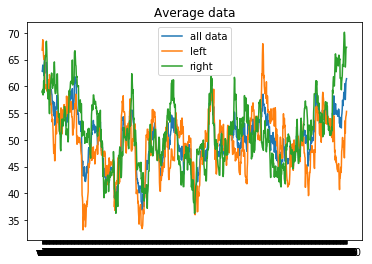

In [349]:
rdf = df.drop(['label'], axis=1)
lrdf = rdf[df.label=='left']
rrdf = rdf[df.label=='right']
rdfm = rdf.mean(axis=0)
lrdfm = lrdf.mean(axis=0)
rrdfm = rrdf.mean(axis=0)
plt.plot(rdfm, label="all data") 
plt.plot(lrdfm, label="left") 
plt.plot(rrdfm, label="right") 
plt.legend()
plt.title("Average data")
plt.show() 

In [5]:
import numpy as np

In [283]:
x = np.array([])
input = rdf.iloc[50]
print (input.shape)

(1000,)


In [284]:
for e in input:
    x = np.append(x, int(e))
    
print (x.shape)

(1000,)


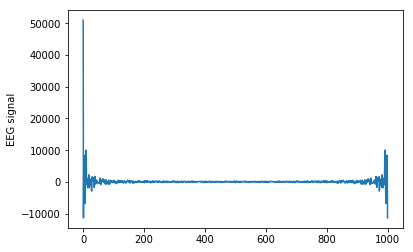

In [285]:
ff = np.fft.fft(x)
plt.plot(ff)
plt.ylabel('EEG signal')
plt.show()

In [68]:
import pywt
coeffs = pywt.wavedec(x, 'db4', level=6)
cA2,cD1,cD2,cD3,cD4,cD5,cD6 = coeffs

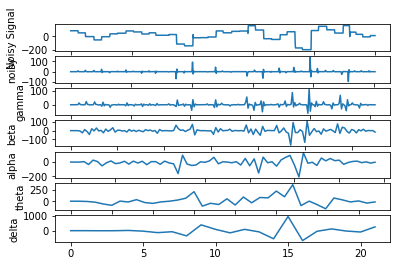

In [69]:
plt.subplot(7, 1, 1)
plt.plot(x)
plt.ylabel('Noisy Signal')
plt.subplot(7, 1, 2)
plt.plot(cD6)
plt.ylabel('noisy')
plt.subplot(7,1,3)
plt.plot(cD5)
plt.ylabel("gamma")
plt.subplot(7,1,4)
plt.plot(cD4)
plt.ylabel("beta")
plt.subplot(7,1,5)
plt.plot(cD3)
plt.ylabel("alpha")
plt.subplot(7,1,6)
plt.plot(cD2)
plt.ylabel("theta")
plt.subplot(7,1,7)
plt.plot(cD1)
plt.ylabel("delta")
plt.draw()
plt.show()

In [51]:
## Standard Deviation

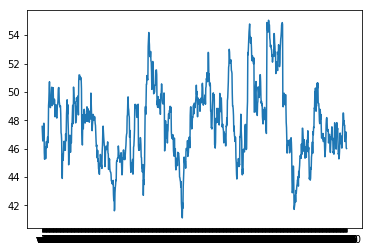

In [97]:
plt.plot(np.std(rdf, axis=0))

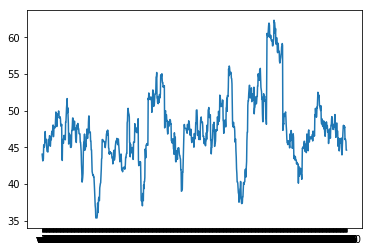

In [98]:
plt.plot(np.std(rdf[df.label=='left'], axis=0))

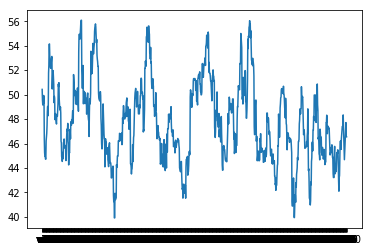

In [99]:
plt.plot(np.std(rdf[df.label=='right'], axis=0))

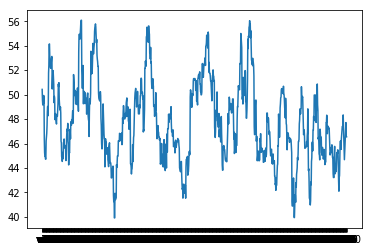

In [100]:
plt.plot(np.std(rrdf, axis=0))

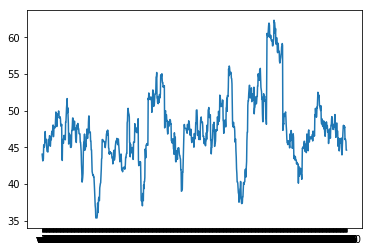

In [101]:
plt.plot(np.std(lrdf, axis=0))

In [ ]:
##Fast Fourier Transform

In [287]:
tfc, tfv = rdf.shape
matrix = rdf.to_numpy()

In [288]:
ff = np.zeros(shape=(tfc,tfv), dtype=complex)
c = 0;
for f in matrix:
    x = np.array([])
    for e in f:
        x = np.append(x, int(e))
    ff[c] = np.fft.fft(x)
    c = c+1

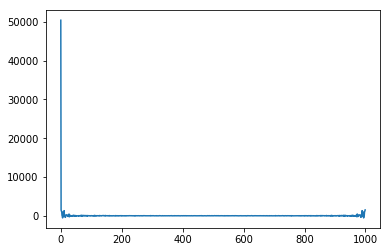

In [289]:
ffm = ff.mean(axis=0)
plt.plot(ffm) 
plt.show() 

In [ ]:
##WaveDecomposition

In [329]:
cA2a = np.empty(shape=(tfc,22), dtype=complex)
cD1a = np.empty(shape=(tfc,22), dtype=complex)
cD2a = np.empty(shape=(tfc,38), dtype=complex)
cD3a = np.empty(shape=(tfc,69), dtype=complex)
cD4a = np.empty(shape=(tfc,131), dtype=complex)
cD5a = np.empty(shape=(tfc,255), dtype=complex)
cD6a = np.empty(shape=(tfc,503), dtype=complex)
i = 0;
for w in ff:
    coeffs = pywt.wavedec(w, 'db4', level=6)
    cA2,cD1,cD2,cD3,cD4,cD5,cD6 = coeffs
    cA2a[i] = cD1
    cD1a[i] = cA2
    cD2a[i] = cD2
    cD3a[i] = cD3
    cD4a[i] = cD4
    cD5a[i] = cD5
    cD6a[i] = cD6
    i = i+1
#ca = np.append(ca, coeffs)
#ca = np.append(ca, coeffs)
#for wd in ff:
    #coeffs = pywt.wavedec(x, 'db4', level=6)
    #cA2,cD1,cD2,cD3,cD4,cD5,cD6 = coeffs

[-9.16037168e+02+7.16139490e+01j -2.69289746e+03+9.48604234e+02j
  6.29203650e+03+1.07252155e+04j -3.59045112e+03+4.68536321e+02j
  1.73287751e+03+6.85349116e+02j -7.32520959e+02-5.48907582e+02j
 -1.22967042e+01-7.75569280e+01j -1.65508168e+01-6.50960319e+01j
  5.87590709e+00-6.40797732e+01j  2.79071832e+01-4.99672800e+01j
  1.06904156e+01-1.00520053e+01j  5.58636987e+01-6.52482765e+00j
  5.14121538e+01+1.95681486e+01j  3.67222663e+01+3.53480239e+01j
  9.17891026e+01+5.71704890e+01j  3.81199081e+01+4.56762071e+01j
  1.50749436e+01+7.46280617e+01j  1.10073577e+03-2.68478152e+03j
  6.23365568e+03-8.28123398e+03j -2.13504404e+03+2.67294417e+03j
 -6.40557469e+03+9.11862553e+03j  1.72660570e+03-1.38468428e+03j]


In [330]:
print (cA2.shape,cD1.shape,cD2.shape,cD3.shape,cD4.shape,cD5.shape, cD6.shape)

(22,) (22,) (38,) (69,) (131,) (255,) (503,)


In [331]:
##Average Channel Values

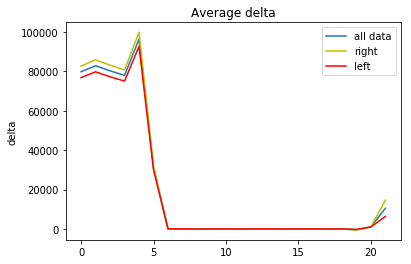

In [343]:
cD1am = cD1a.mean(axis=0)
cD1aml = cD1a[df.label=="left"].mean(axis=0)
cD1amr = cD1a[df.label=="right"].mean(axis=0)
plt.plot(cD1am, label="all data") 
plt.plot(cD1amr, 'y', label="right") 
plt.plot(cD1aml, 'r', label="left") 
plt.ylabel("delta")
plt.legend()
plt.title("Average delta")
plt.show() 

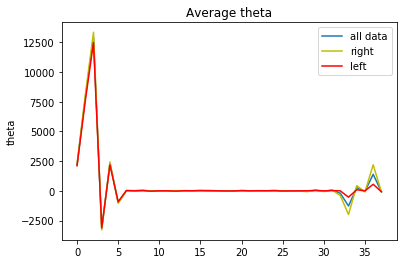

In [342]:
cD2am = cD2a.mean(axis=0)
cD2aml = cD2a[df.label=="left"].mean(axis=0)
cD2amr = cD2a[df.label=="right"].mean(axis=0)
plt.plot(cD2am, label="all data") 
plt.plot(cD2amr, 'y', label="right") 
plt.plot(cD2aml, 'r', label="left") 
plt.ylabel("theta")
plt.legend()
plt.title("Average theta")
plt.show() 

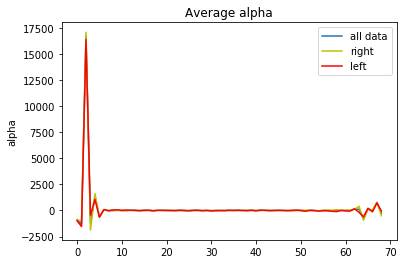

In [344]:
cD3am = cD3a.mean(axis=0)
cD3aml = cD3a[df.label=="left"].mean(axis=0)
cD3amr = cD3a[df.label=="right"].mean(axis=0)
plt.plot(cD3am, label="all data") 
plt.plot(cD3amr, 'y', label="right") 
plt.plot(cD3aml, 'r', label="left") 
plt.ylabel("alpha")
plt.legend()
plt.title("Average alpha")
plt.show() 

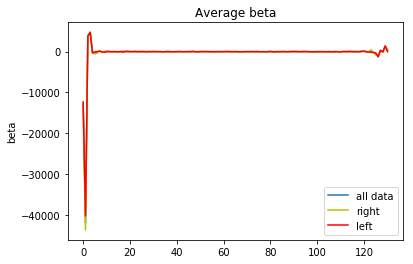

In [345]:
cD4am = cD4a.mean(axis=0)
cD4aml = cD4a[df.label=="left"].mean(axis=0)
cD4amr = cD4a[df.label=="right"].mean(axis=0)
plt.plot(cD4am, label="all data") 
plt.plot(cD4amr, 'y', label="right") 
plt.plot(cD4aml, 'r', label="left") 
plt.ylabel("beta")
plt.legend()
plt.title("Average beta")
plt.show() 

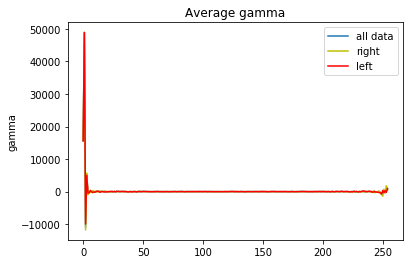

In [346]:
cD5am = cD5a.mean(axis=0)
cD5aml = cD5a[df.label=="left"].mean(axis=0)
cD5amr = cD5a[df.label=="right"].mean(axis=0)
plt.plot(cD5am, label="all data") 
plt.plot(cD5amr, 'y', label="right") 
plt.plot(cD5aml, 'r', label="left") 
plt.ylabel("gamma")
plt.legend()
plt.title("Average gamma")
plt.show() 

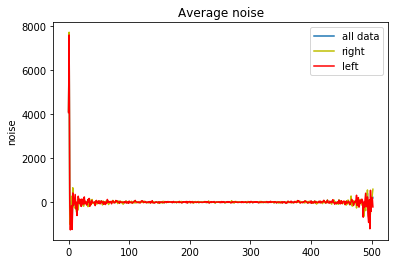

In [347]:
cD6am = cD6a.mean(axis=0)
cD6aml = cD6a[df.label=="left"].mean(axis=0)
cD6amr = cD6a[df.label=="right"].mean(axis=0)
plt.plot(cD6am, label="all data") 
plt.plot(cD6amr, 'y', label="right") 
plt.plot(cD6aml, 'r', label="left") 
plt.ylabel("noise")
plt.legend()
plt.title("Average noise")
plt.show() 

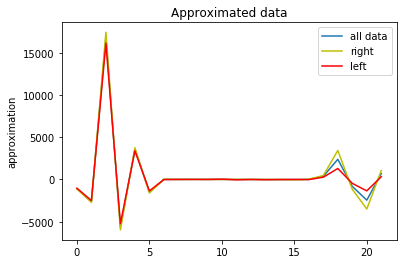

In [351]:
cA2am = cA2a.mean(axis=0)
cA2aml = cA2a[df.label=="left"].mean(axis=0)
cA2amr = cA2a[df.label=="right"].mean(axis=0)
plt.plot(cA2am, label="all data") 
plt.plot(cA2amr, 'y', label="right") 
plt.plot(cA2aml, 'r', label="left") 
plt.ylabel("approximation")
plt.legend()
plt.title("Approximated data")
plt.show() 